<a href="https://colab.research.google.com/github/Akshatpattiwar512/Principal-Component-Analysis/blob/main/Cervical_Cancer_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
df_raw = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [52]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [53]:
df_nan = df_raw.replace('?', np.nan) 

In [54]:
df_nan.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [55]:
df = df_nan

In [56]:
df1 = df.apply(pd.to_numeric)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [58]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0)
df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [59]:
####filling NaN values with dummy values for categorical variables.

df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [69]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [61]:
df_final = df #temporary save


In [62]:
df.describe()

,Age,STDs: Number of diagnosis,Biopsy,Smokes_1,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_1,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0,IUD_0.0,IUD_1.0,STDs_1,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.064103,0.015152,0.841492,0.143357,0.125874,0.313520,0.560606,0.136364,0.766900,0.096737,0.122378,0.785548,0.092075,0.979021,0.020979,0.989510,0.010490,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,0.302545,0.245078,0.122227,0.365430,0.350641,0.331901,0.464194,0.496603,0.343374,0.423052,0.295771,0.327913,0.410681,0.289300,0.143398,0.143398,0.101939,0.101939,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('Biopsy', axis=1)
y = df["Biopsy"]

X = StandardScaler().fit_transform(X)  # Standardizing the values in X.

pca = PCA(0.80)  # Changes in variance percentage can be made here.
prin_comp = pca.fit_transform(X)
principalDf = pd.DataFrame(data = prin_comp)

print(principalDf)

print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)

           0         1         2   ...        12        13        14
0   -1.238924  0.147985 -0.451984  ... -0.151504 -0.678512  0.016030
1   -1.346698  0.145350 -0.422491  ...  0.358398 -0.351073 -0.290855
2   -1.158040  0.315043 -0.591149  ... -0.029815 -0.019156  0.028253
3    8.313312  7.360855  1.239751  ...  3.625766 -1.062291  0.142025
4   -0.622583  0.851446 -1.494043  ... -0.642097  0.251376 -0.183432
..        ...       ...       ...  ...       ...       ...       ...
853 -1.141761  0.292214 -0.572299  ... -0.328150 -0.118136  0.355271
854 -0.996315  0.600650 -1.087300  ... -0.073616  0.410904  0.042536
855 -0.135910  0.821405 -1.349369  ...  0.620536  0.493656  0.279719
856 -1.025292  0.577505 -0.995678  ... -0.195200  0.824474  0.407246
857 -1.117468  0.491020 -0.880743  ...  0.020061  0.489474  0.256256

[858 rows x 15 columns]

Eigenvalues 
[5.77195898 5.44344559 4.29000842 3.31497816 3.16513465 2.58468492
 2.42350261 2.06160326 1.99691653 1.69214499 1.35917529 1.32217509

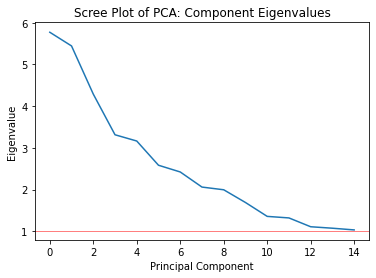

In [64]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

In [65]:
finalDf = pd.concat([principalDf, df[["Biopsy"]]], axis = 1)
finalDf


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Biopsy
0,-1.238924,0.147985,-0.451984,-0.658863,-0.383031,-1.114888,1.417886,-0.745182,1.126548,-0.058631,-0.771259,-0.117709,-0.151504,-0.678512,0.016030,0
1,-1.346698,0.145350,-0.422491,-0.708970,-0.733591,-1.278191,1.453722,-0.686895,1.145940,-0.252082,-0.760898,-0.424453,0.358398,-0.351073,-0.290855,0
2,-1.158040,0.315043,-0.591149,-0.794299,-0.464896,-0.716270,0.811499,-0.785974,1.261973,-0.286081,0.895467,0.222328,-0.029815,-0.019156,0.028253,0
3,8.313312,7.360855,1.239751,3.920406,14.839752,-4.044044,-0.656087,-1.600592,-1.127918,0.514490,2.509116,-0.475981,3.625766,-1.062291,0.142025,0
4,-0.622583,0.851446,-1.494043,-0.619715,0.638127,1.342782,-2.229930,1.360379,-1.357651,0.107332,1.937134,1.159574,-0.642097,0.251376,-0.183432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,-1.141761,0.292214,-0.572299,-0.800465,-0.360585,-0.828085,0.985142,-0.811356,1.255422,-0.121703,0.779978,0.044648,-0.328150,-0.118136,0.355271,0
854,-0.996315,0.600650,-1.087300,-0.740124,-0.077619,0.112026,-0.841622,1.015515,-0.914034,0.011474,0.598266,-0.364599,-0.073616,0.410904,0.042536,0
855,-0.135910,0.821405,-1.349369,1.041485,-1.903018,-0.790147,0.720799,1.572005,0.174042,5.234015,-0.247397,-0.194852,0.620536,0.493656,0.279719,0
856,-1.025292,0.577505,-0.995678,-0.911538,-0.185549,-0.058679,-0.674438,0.509293,-0.350853,-0.248195,1.765185,-0.098350,-0.195200,0.824474,0.407246,0


In [66]:
df_cat=df.select_dtypes(include="object")
df_cat1=df_cat.apply(pd.to_numeric)
df_cat1.columns

Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],
      dtype='object')

In [79]:
train2 = df[df.columns[28:37]]
train2.reset_index(drop=True, inplace=True)
train3= df[["Age"]]
train3.reset_index(drop=True, inplace=True)
train4=df[["STDs: Number of diagnosis"]]
train4.reset_index(drop=True, inplace=True)
frames=[train2,train3,train4]
first_PCA = pd.concat(frames, axis=1)
first_PCA.head()

,Hormonal Contraceptives_1,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0,IUD_0.0,IUD_1.0,STDs_1,STDs_0.0,STDs_1.0,Age,STDs: Number of diagnosis
0,0,1,0,0,1,0,0,1,0,18,0
1,0,1,0,0,1,0,0,1,0,15,0
2,0,1,0,0,1,0,0,1,0,34,0
3,0,0,1,0,1,0,0,1,0,52,0
4,0,0,1,0,1,0,0,1,0,46,0


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(first_PCA)
pca_output = pca.transform(first_PCA)
ps = pd.DataFrame(pca_output)

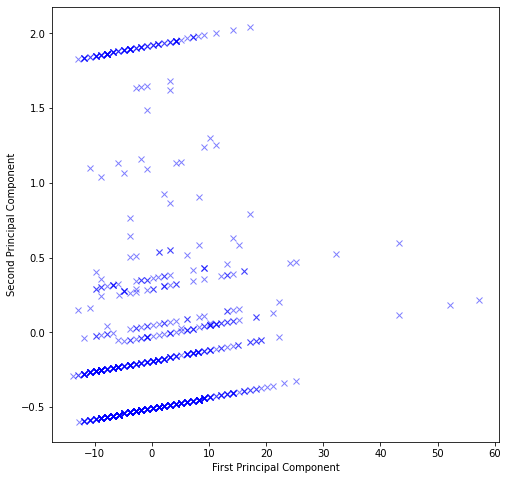

In [81]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
two_comp = pd.DataFrame(ps[[0,1]])

fig = plt.figure(figsize=(8,8))
plt.plot(two_comp[0], two_comp[1], 'x', markersize=6, color='blue', alpha=0.5)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


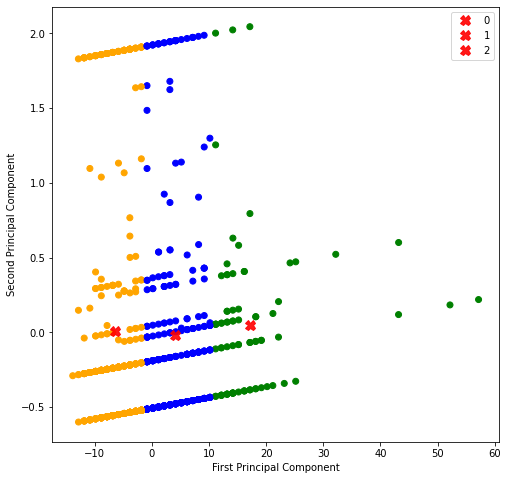

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=3,random_state=42).fit(two_comp)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(two_comp)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','green']
colored = [colors[k] for k in c_preds]

plt.scatter(two_comp[0],two_comp[1],  color = colored)
for i,c in enumerate(centers):
    plt.plot(c[0], c[1], 'X', markersize=10, color='red', alpha=0.9, label=''+str(i))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()